In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt


In [34]:
# 데이터 로드
df = pd.read_csv('../data/gym_churn_us.csv')
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [35]:
# 1. 데이터 로드 완료

# 2. 데이터 전처리

# 이진으로 분류된 데이터를 제외하고 범주형 데이터를 위한 전처리
columns = ['Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
scaler = StandardScaler()
df[columns] =scaler.fit_transform(df[columns])

# 3. 데이터 분리
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델 적용 및 평가

# 4_1. 로지스틱 모델
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 평가
print(f'훈련 점수: {lr.score(X_train, y_train)}, 테스트 점수: {lr.score(X_test, y_test)}') 

# 모델 성능 평가
y_pred_lr = lr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} 모델 성능 평가")
    print("accuracy_score", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print(f'f1_score: {f1_score(y_test, y_pred)}')

evaluate_model(y_test, y_pred_lr, 'LogisticRegression')


훈련 점수: 0.9334375, 테스트 점수: 0.91625

LogisticRegression 모델 성능 평가
accuracy_score 0.91625
precision: 0.8729281767955801
f1_score: 0.825065274151436


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic_Regression 최적의 파라미터 찾아보기

In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

random_search = RandomizedSearchCV(LogisticRegression(), param_grid, cv=5)
random_search.fit(X_train, y_train)


# 최적의 파라미터 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)

# 최적의 모델로 예측
best_lr = random_search.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
y_pred_proba_best_lr = best_lr.predict_proba(X_test)[:, 1]

# 성능 평가
evaluate_model(y_test, y_pred_best_lr, 'Logistic')

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

최적의 하이퍼파라미터: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

Logistic 모델 성능 평가
accuracy_score 0.91625
precision: 0.8688524590163934
f1_score: 0.825974025974026


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\si

### 결론
- 최적의 하이퍼파라미터: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

- Logistic 모델 성능 평가
- accuracy_score 0.915
- precision: 0.8681318681318682
- f1_score: 0.8229166666666666


- 이전과 비교   
(기본값 : C: 1.0 (정규화 강도)
penalty: 'l2' (L2 정규화)
solver: 'lbfgs' (최적화 알고리즘))


accuracy_score 0.91625
precision: 0.8729281767955801
f1_score: 0.825065274151436

### 기본값에서 조금 다르게 파라미터가 나왓지만 점수의 변화는 크지 않다!


## ROC_auc Score 적용 및 시각화

In [37]:
from sklearn.metrics import roc_auc_score

# 모델 성능 평가

# logisticRegression Model
y_pred_lr = lr.predict(X_test)
y_pred_lr_proba = lr.predict_proba(X_test)[:, 1]
# Roc_auc 평가 확인
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr_proba))


ROC-AUC Score: 0.9693615682638498


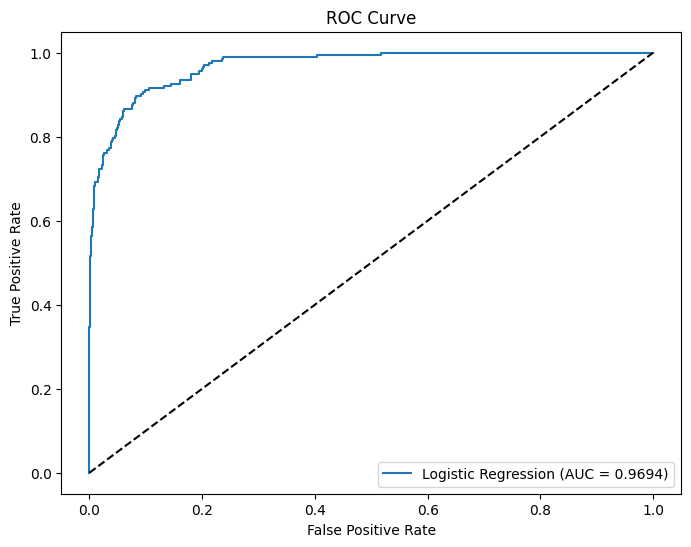

In [38]:
# Roc_auc 평가 확인
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Roc_curve 시각화
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_proba):.4f})')
    
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_lr_proba, "Logistic Regression")

# 대각선 기준선 (무작위 예측)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 최종 결론

1.  GridsearchCV & RandomSerchCV  사용해서 최적의 파라미터 찾고 모델에 적용 및 점수 비교
- Logistic의 경우,
    - 기본값과 파라미터의 차이가 존재하긴 하지만 점수에서 매우 미미한 차이를 보임

4. Roc_Auc Score
- 시각화해놓은 ROC_curve에서 쉽게 확인할 수 있듯이
-  0.9694로 높은 점수  


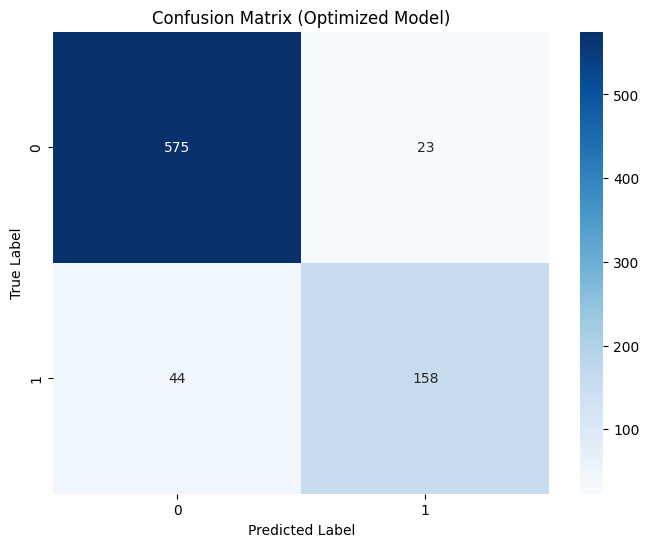

In [39]:
# 혼동 행렬 시각화
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Optimized Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

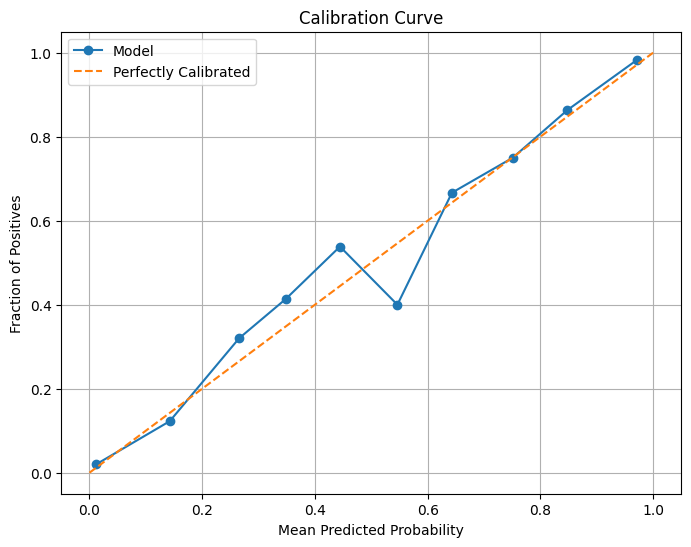

In [40]:
# Calibration Curve - 모델의 예측 확률이 실제 클래스 확률과 얼마나 잘 일치하나
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_pred_lr_proba, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid()

In [45]:
# new_data = pd.DataFrame({
#     'gender': [0],
#     'Near_Location': [1],
#     'Partner': [0],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [12],
#     'Group_visits': [1],
#     'Age': [31],
#     'Avg_additional_charges_total': [113.20293765105819],
#     'Month_to_end_contract': [12.0],
#     'Lifetime': [7], 
#     'Avg_class_frequency_total': [1.9229360550418195],
#     'Avg_class_frequency_current_month': [0.9102435215196407]
# }, index=[0])

new_data = pd.DataFrame({
    'gender': [1],
    'Near_Location': [1],
    'Partner': [1],
    'Promo_friends': [0],
    'Phone': [1],
    'Contract_period': [1],
    'Group_visits': [0],
    'Age': [27],
    'Avg_additional_charges_total': [226.7838237446521],
    'Month_to_end_contract': [1.0],
    'Lifetime': [2], 
    'Avg_class_frequency_total': [2.3485353357599856],
    'Avg_class_frequency_current_month': [1.5843158272716689]
}, index=[0])

# new_data = pd.DataFrame({
#     'gender': [1],
#     'Near_Location': [1],
#     'Partner': [0],
#     'Promo_friends': [0],
#     'Phone': [1],
#     'Contract_period': [1],
#     'Group_visits': [0],
#     'Age': [28],
#     'Avg_additional_charges_total': [42.160809042705715],
#     'Month_to_end_contract': [1.0],
#     'Lifetime': [1], 
#     'Avg_class_frequency_total': [0.4250114097298257],
#     'Avg_class_frequency_current_month': [0.6052465413331591]
# }, index=[0])

prediction = best_lr.predict(new_data)
print(f"예측된 결과: {'나갈 회원' if prediction[0] == 1 else '남을 회원'}")

예측된 결과: 남을 회원
